In [1]:
import pandas as pd
pd.set_option("display.max_columns",250)
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yaml as yaml
import openpyxl
import random

sns.set()
# import openmatrix as omx
# import geopandas
# import pyproj
# import re
# import xlrd
from IPython.display import display, HTML

In [2]:
def add_percentage_to_crosstab(ct):
    total_counts = ct['All'][:-1].sum()
    ct['Percent'] = ct.apply(lambda row: round(100 * row['All'] / total_counts, 2), axis=1)
    ct.loc['Percent'] = ct.apply(lambda col: round(100 * col['All'] / total_counts, 2), axis=0)
    ct.loc['Percent', 'Percent'] = pd.NA
    return ct

In [3]:
def make_percentage_bar_plot(variable, title, xlabel, xlabel_rotation):
    grouped_df = obs_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_cta(variable, title, xlabel, xlabel_rotation):
    grouped_df = cta_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_metra(variable, title, xlabel, xlabel_rotation):
    grouped_df = metra_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()

In [4]:

with open(r'C:/Projects/cmap_activitysim/cmap_abm/survey_data_prep/cmap_inputs.yml') as file:
    settings = yaml.load(file, Loader=yaml.SafeLoader)

metra_path  = os.path.join(settings['data_dir'], 'Metra_2019/2019_Origin-Destination_survey_package/metra_with_autosuff.csv')
cta_path =os.path.join(settings['data_dir'], 'CTA_2017/CTA OD Final Data.xlsx')

survey_hh_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'household.csv')
survey_per_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'person.csv')
survey_place_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'place.csv')
survey_transit_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'place_transit.csv')
# survey_weights_path =  os.path.join(settings['popsim_folder'], 'output/final_summary_hh_weights.csv')
survey_trip_weights_path = os.path.join(settings['proj_dir'], 'underreporting_correction/trip_weights.csv')

metra_df = pd.read_csv(metra_path, encoding='cp1252')
cta_df = pd.read_excel(cta_path, sheet_name = 'Data')

survey_hh_df = pd.read_csv(survey_hh_path)
survey_per_df = pd.read_csv(survey_per_path)
survey_place_df = pd.read_csv(survey_place_path)
survey_transit_df = pd.read_csv(survey_transit_path)
survey_trip_weights_df = pd.read_csv(survey_trip_weights_path)
# survey_weights_df = pd.read_csv(survey_weights_path)

output_path = r"output"


C:\Users\teddy.lin\AppData\Local\Temp\16\ipykernel_10796\1650911488.py:14: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  metra_df = pd.read_csv(metra_path, encoding='cp1252')
C:\Users\teddy.lin\AppData\Local\Temp\16\ipykernel_10796\1650911488.py:18: DtypeWarning: Columns (45,50) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_per_df = pd.read_csv(survey_per_path)
C:\Users\teddy.lin\AppData\Local\Temp\16\ipykernel_10796\1650911488.py:19: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_place_df = pd.read_csv(survey_place_path)


In [5]:
survey_transit_df

,sampno,perno,placeno,transitno,latitude,longitude,mode,agency_name,line_name,line_short_name,departure_stop_name,arrival_stop_name,imputed
0,20000300,1,2,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
1,20000300,1,2,2,41.897683,-87.620054,BUS,Chicago Transit Authority,STREETERVILLE/TAYLOR,157,PEARSON & DEWITT,CLINTON & JACKSON,0
2,20000300,1,2,3,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
3,20000300,1,3,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
4,20000300,1,3,2,41.876999,-87.639435,BUS,Chicago Transit Authority,WATER TOWER EXPRESS,125,VAN BUREN & CANAL,MIES VAN DER ROHE & PEARSON,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33272,70100998,1,6,2,41.842554,-87.724574,BUS,Chicago Transit Authority,PULASKI,53,PULASKI/27TH,PULASKI & 24TH STREET,0
33273,70100998,1,6,3,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
33274,70100998,1,7,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
33275,70100998,1,7,2,41.853792,-87.733284,SUBWAY,Chicago Transit Authority,PINK LINE,PINK,KOSTNER,KEDZIE-DOUGLAS,2


In [6]:
print("Total entries in the CTA on board survey:", len(cta_df))
print("Weighted total of entries in the CTA survey:", cta_df['unlinked_weight'].sum())

print("Total entries in the Metra on board survey:", len(metra_df))
print("Weighted total of entries in the Metra survey:", metra_df['ON_Weight'].sum())

Total entries in the CTA on board survey: 69947
Weighted total of entries in the CTA survey: 1339652.681
Total entries in the Metra on board survey: 56475
Weighted total of entries in the Metra survey: 130000.00000000003


# Transit Onboard Survey Data Coding

## Recode relevant variables to match between each dataset

In [7]:

cta_df_orig = cta_df.copy()
metra_df_orig = metra_df.copy()


In [8]:
cta_df = cta_df_orig[['id', 'route_id', 'direction', 'origin_place_type', 'access_mode', 'egress_mode', 
                     'dest_place_type', 'total_transfers', 'reverse_exact', 'reverse',
                    'hh_employed', 'hh_veh', 'hh_size', 'hh_children', 'employ', 'student',
                    'license', 'age', 'gender', 'income', 'race_1', 'race_2', 'race_3', 'race_4', 
                    'race_5', 'race_6', 'trip_purp','o_zone', 'd_zone', 'TOD','unlinked_weight', 'linked_weight']].copy()

metra_df = metra_df_orig[['Serial_ID', 'Mode_Access_Code', 'Mode_Egress_Code', 
                          'Rail_Line', 'Train_Line',
                         'Transfer_From', 'Transfer_To', 'Origin_Code', 
                          'Destination_Code', 'ON_Weight', 'OFF_Weight',
                         'Gender_Code', 'Age_Code', 'Race_single_field',
                         'HH_People', 'HH_Children', 'HH_Employed', 'HH_Income_Code', 'Time', 'autosuff']].copy()



In [9]:
# Join fields to survey DF for PACE data

# join weights:
survey_df_orig = survey_place_df[['sampno', 'perno', 'placeno', 'tpurp', 'arrtime']] # arrival time to get TOD

survey_trip_weights_df['placeno'] = survey_trip_weights_df['PLANO']
survey_trip_weights_df.drop(['PLANO'], axis = 1, inplace = True)

survey_df_1 = survey_df_orig.merge(survey_trip_weights_df, on = ['sampno', 'perno', 'placeno'], how = 'left')


In [10]:
# join hh info:
workers = survey_per_df[(survey_per_df['wkstat'] == 0 ) | (survey_per_df['emply_ask'] == 1)].groupby(['sampno'])['perno'].count().reset_index(name = 'workers')


survey_hh_df_1 = survey_hh_df.merge(workers, on =['sampno'], how = 'left')
survey_hh_df_1.loc[pd.isna(survey_hh_df_1['workers']), 'workers'] = 0

survey_df_2 = survey_df_1.merge(survey_hh_df_1[['sampno', 'hhsize', 'hhveh', 'workers']], on = ['sampno'], how = 'inner')

survey_df_3 = survey_df_2.merge(survey_per_df[['sampno', 'perno', 'schol']], on = ['sampno', 'perno'], how = 'inner')

survey_df = survey_df_3.copy()

survey_df.workers.value_counts()

2.0    62904
1.0    42494
0.0    10686
3.0     9138
4.0     2485
5.0      415
6.0       54
7.0       53
Name: workers, dtype: int64

In [11]:
# isolate PACE trips and get access/egress
survey_transit_df.agency_name.value_counts()
pace_df = survey_transit_df[survey_transit_df['agency_name'] == 'PACE']
# other_agency_df  = survey_transit_df[(survey_transit_df['agency_name'] != 'PACE') & (survey_transit_df['agency_name'] != '-9')]

survey_df_pace_1 = survey_transit_df.merge(pace_df[['sampno', 'perno', 'placeno', 'agency_name']], on = ['sampno', 'perno', 'placeno'], how = 'inner')

# merged =survey_df_pace_1.merge(other_agency_df[['sampno', 'perno', 'placeno', 'agency_name']], on = ['sampno', 'perno', 'placeno'], how='left', indicator=True)

# survey_df_pace = merged[merged['_merge'] == 'left_only'].copy()

survey_df_pace = survey_df_pace_1.drop_duplicates() # could do the above merge better instead

survey_df_pace['access'] = 0

survey_df_pace.loc[survey_df_pace.transitno == 1, 'access'] = 1

idx = survey_df_pace.groupby(['sampno', 'perno', 'placeno'])['transitno'].transform(max) == survey_df_pace['transitno']

survey_df_pace['egress'] = 0

survey_df_pace.loc[idx, 'egress'] = 1

survey_df_pace.egress.value_counts()
survey_df_pace.access.value_counts()

C:\Users\teddy.lin\AppData\Local\Temp\16\ipykernel_10796\4074340825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_pace['access'] = 0
C:\Users\teddy.lin\AppData\Local\Temp\16\ipykernel_10796\4074340825.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_pace['egress'] = 0


0    2360
1     814
Name: access, dtype: int64

In [12]:
# create one record per pace trip

pace_transit_records = survey_df_pace[(survey_df_pace['access'] == 0) & (survey_df_pace['egress'] == 0) ]
transfers = pace_transit_records.groupby(['sampno', 'perno', 'placeno'])['transitno'].count().reset_index(name = 'transfers')
#transfers['transfers'] = transfers['transfers'] - 1
pace_transfers = pace_transit_records[pace_transit_records['agency_name_x'] == 'PACE'].groupby(['sampno', 'perno', 'placeno'])['transitno'].count().reset_index(name = 'transfers')
pace_transfers['transfers'] = pace_transfers['transfers'] - 1
idx = pace_transit_records.groupby(['sampno', 'perno', 'placeno'])['transitno'].transform(min) == pace_transit_records['transitno']
pace_transit_records = pace_transit_records[idx].copy()


access_records = survey_df_pace[survey_df_pace['access'] == 1][['sampno', 'perno', 'placeno', 'mode']]
egress_records = survey_df_pace[survey_df_pace['egress'] == 1][['sampno', 'perno', 'placeno', 'mode']]

access_records['access_mode'] = access_records['mode']
egress_records['egress_mode'] = egress_records['mode']

pace_transit_records = pace_transit_records.merge(access_records[['sampno', 'perno', 'placeno', 'access_mode']], how = 'inner', on = ['sampno', 'perno', 'placeno'])
pace_transit_records = pace_transit_records.merge(egress_records[['sampno', 'perno', 'placeno', 'egress_mode']], how = 'inner', on = ['sampno', 'perno', 'placeno'])
pace_transit_records = pace_transit_records.merge(pace_transfers, how = 'inner', on = ['sampno', 'perno', 'placeno'])

pace_transit_records
pace_transfers.transfers.value_counts()


0    707
1     96
2      9
3      2
Name: transfers, dtype: int64

In [13]:
pace_transfers

,sampno,perno,placeno,transfers
0,20002935,1,4,0
1,30001638,1,2,0
2,30001638,2,2,0
3,30004480,1,5,0
4,30006408,2,3,0
...,...,...,...,...
809,70100649,1,3,0
810,70100658,1,3,0
811,70100895,1,2,0
812,70100895,1,5,0


In [14]:
# get origin purpose from survey df
survey_df['opurp'] = survey_df.groupby(['sampno', 'perno'])['tpurp'].shift()


# join weights and other info to transit records

pace_df = pace_transit_records.merge(survey_df, on = ['sampno', 'perno', 'placeno'], how = 'inner')

pace_df['unlinked_weight'] = (pace_df['transfers'] + 1) * pace_df['trip_weight']

pace_df['linked_weight'] = pace_df['trip_weight']


pace_df.unlinked_weight.sum()
#pace_df.linked_weight.sum()


166729.51299017618

### Boardings by route


Questions:

In [15]:
cta_route_df = cta_df.groupby(['route_id'])['unlinked_weight'].agg(sum).sort_index(level='route_id').to_frame()
cta_route_df['Percent'] = cta_route_df['unlinked_weight'] / cta_route_df['unlinked_weight'].sum() * 100

# print(route_dict.head())
display(HTML(cta_route_df.to_html()))

,unlinked_weight,Percent
route_id,,
1- Bronzeville/Union Station,1641.155000,0.122506
100- Jeffery Manor Express,646.684000,0.048273
103- West 103rd,2338.208000,0.174538
106- East 103rd,1386.054000,0.103464
108- Halsted/95th,1205.497000,0.089986
11- Lincoln,1950.468000,0.145595
111- 111th/King Drive,3402.060000,0.253951
111A- Pullman Shuttle,175.416000,0.013094
112- Vincennes/111th,2057.344000,0.153573


In [16]:
metra_route_df = metra_df.groupby(['Train_Line'])['ON_Weight'].agg(sum).sort_index(level='Train_Line').to_frame()
metra_route_df['Percent'] = metra_route_df['ON_Weight'] / metra_route_df['ON_Weight'].sum() * 100

# print(route_dict.head())
display(HTML(metra_route_df.to_html()))

,ON_Weight,Percent
Train_Line,,
1,1539.013456,1.183857
3,0.000000,0.000000
4,1449.523812,1.115018
5,10188.196066,7.837074
6,12888.449191,9.914192
8,4343.606983,3.341236
9,1339.817476,1.030629
10,26918.541097,20.706570
11,13764.452599,10.588040


In [17]:
pace_route_df = pace_df.groupby(['line_name'])['trip_weight'].agg(sum).sort_index(level='line_name').to_frame()
pace_route_df['Percent'] = pace_route_df['trip_weight'] / pace_route_df['trip_weight'].sum() * 100

# print(route_dict.head())
display(HTML(pace_route_df.to_html()))

,trip_weight,Percent
line_name,,
159TH STREET,1916.724669,1.347189
55TH/NARRAGANSETT,118.692750,0.083424
63RD,298.967316,0.210132
67TH-69TH-71ST,196.082261,0.137818
69TH-UPS EXPRESS,142.836154,0.100394
87TH,118.691734,0.083424
87TH / 111TH / 127TH,434.650357,0.305498
95TH - RIVER OAKS,1323.730012,0.930397
95TH PARK-N-RIDE EXPRESS-,356.052558,0.250255


In [18]:
def code_purpose_cta(value):
    if (value == 'Work'):
        return 'Work'
    elif (value == 'Home'):
        return 'Home'
    elif (value == 'College / University (students only)'):
        return 'University'
    elif (value == 'Airport (passengers only)'):
        return 'Maintenance'
    elif (value == 'Recreation / Sightseeing / Restaurant'):
        return 'Discretionary'
    elif (value == 'Medical Service / Hospital (non-work)'):
        return 'Maintenance'
    elif (value == 'Social Visit / Church/ Personal'):
        return 'Discretionary'
    elif (value == 'Personal business or errands'):
        return 'Maintenance'
#     elif (value == 10):
#         return 'Escort'
    elif (value == 'Shopping'):
        return 'Maintenance'
#     elif (value == 12):
#         return 'Dine out'
    elif (value == 'School K-12 (students only)'):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 'Other'):
        return 'Maintenance'


def code_purpose_metra(value):
    if (value == 2):
        return 'Work'
    elif (value == 1):
        return 'Home'
    elif (value == 5):
        return 'University'
    elif (value == 6):
        return 'University'
    elif (value == 4):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 3):
        return 'Maintenance'
    elif (value == 8):
        return 'Maintenance'
    else:
        return 'Maintenance'

def code_purpose_pace(value):
    if ((value == 1) or (value == 2)):
        return 'Home'
    elif(value == 3 or value == 4):
        return 'Work'
    elif(value == 5):
        return 'Maintenance'
    elif (value == 6):
        return 'University' # separate into k12/uni later
    elif(value in [7, 8, 9, 10, 11, 12, 13, 15, 26, 27, 28, 97]):
        return 'Maintenance'
    else:
        return 'Discretionary'




In [19]:
cta_df['ORIG_PURPOSE'] = cta_df['origin_place_type'].apply(lambda value: code_purpose_cta(value))

cta_df['DEST_PURPOSE'] = cta_df['dest_place_type'].apply(lambda value: code_purpose_cta(value))

metra_df['ORIG_PURPOSE'] = metra_df['Origin_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['DEST_PURPOSE'] = metra_df['Destination_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['ORIG_PURPOSE'] = metra_df['Origin_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['DEST_PURPOSE'] = metra_df['Destination_Code'].apply(lambda value: code_purpose_metra(value))

pace_df['DEST_PURPOSE'] = pace_df['tpurp'].apply(lambda value: code_purpose_pace(value))

pace_df['ORIG_PURPOSE'] = pace_df['opurp'].apply(lambda value: code_purpose_pace(value))

pace_df.loc[(pace_df['DEST_PURPOSE'] == 'University') & (pace_df['schol'] > 0 ) & (pace_df['schol'] <= 4 ), 'DEST_PURPOSE'] = 'K-12 school'

pace_df.loc[(pace_df['ORIG_PURPOSE'] == 'University') &  (pace_df['schol'] > 0 ) & (pace_df['schol'] <= 5 ), 'ORIG_PURPOSE'] = 'K-12 school'                                                     

In [20]:
pace_df.tpurp.value_counts().sort_index()

-8       1
 1     313
 2       2
 3     217
 4       7
 5      10
 6      54
 7       1
 8       7
 9      48
 10      2
 11      2
 12     24
 13      1
 14      1
 15     24
 16      7
 17     20
 18      9
 19     11
 20      1
 21      2
 23      7
 24      9
 25      2
 26     18
 27      2
 28     12
Name: tpurp, dtype: int64

In [21]:
print(cta_df['ORIG_PURPOSE'].value_counts())
print(cta_df['DEST_PURPOSE'].value_counts())
print(metra_df['ORIG_PURPOSE'].value_counts())
print(metra_df['DEST_PURPOSE'].value_counts())
print(pace_df['ORIG_PURPOSE'].value_counts())
print(pace_df['DEST_PURPOSE'].value_counts())
print(pace_df[pace_df['ORIG_PURPOSE'] == 'K-12 school'][['schol', 'perno']])


Home             32787
Work             19205
Maintenance       7040
Discretionary     6448
University        3263
K-12 school       1204
Name: ORIG_PURPOSE, dtype: int64
Home             27878
Work             19926
Discretionary     9262
Maintenance       8688
University        3254
K-12 school        939
Name: DEST_PURPOSE, dtype: int64
Home           51820
Maintenance     2631
Work            1739
University       178
K-12 school      107
Name: ORIG_PURPOSE, dtype: int64
Work           49724
Maintenance     4554
University      1126
Home             803
K-12 school      268
Name: DEST_PURPOSE, dtype: int64
Home             297
Work             260
Maintenance      142
Discretionary     69
University        24
K-12 school       22
Name: ORIG_PURPOSE, dtype: int64
Home             315
Work             224
Maintenance      151
Discretionary     70
K-12 school       31
University        23
Name: DEST_PURPOSE, dtype: int64
     schol  perno
95       4      2
107      4      3
148      4

### Access mode

* 1 - PNR (driving, carshare)
* 2 - KNR (dropped off, taxi/TNC)
* 3 - Walk (includes bike, scooter, skateboard)

Questions:
* Should taxi be TNC?


In [22]:
pace_df.access_mode.value_counts()

WALKING                              669
PARK AND RIDE                         76
PRIVATE SHUTTLE OR SOMETHING ELSE     36
KISS AND RIDE                         24
BICYCLING                              8
TAXI / UBER / LYFT                     1
Name: access_mode, dtype: int64

In [23]:
# Code access/egress before imputation

def code_access_mode_cta(value):
    if (value in  ['Was dropped off by friend/family in a car', 'Biked on own bike', 
                   'Taxi', 'Divvy bike share', 'Was picked up by friend/family in a car']):
        return 'KNR'
    elif (value == 'Uber, Lyft, etc.'):
        return 'TNR'
    elif (value in ['Drove alone and parked', 'Carpool/vanpool', 'Got in a parked vehicle and drove alone']):
        return 'PNR'
    return 'Walk'


def code_access_mode_metra(value):
    if (value in  [3, 10, 12, 13, 14]):
        return 'KNR'
    if (value == 11):
        return 'TNR'
    elif (value in [2, 4, 5]):
        return 'PNR'
    return 'Walk'


def code_egress_mode_metra(value):
    if (value in  [10, 6, 8, 9]):
        return 'KNR'
    if (value == 7):
        return 'TNR'
    elif (value in [11, 12, 13]):
        return 'PNR'
    return 'Walk'

def code_access_mode_pace(value):
    if (value == 'PARK AND RIDE'):
        return 'PNR'
    elif (value in ['PRIVATE SHUTTLE OR SOMETHING ELSE', 'BICYCLE', 'KISS AND RIDE']):
        return 'KNR'
    return 'Walk'

cta_df['access_mode_survey'] = cta_df['access_mode']
cta_df['egress_mode_survey'] = cta_df['egress_mode']
cta_df['access_mode'] = cta_df['access_mode_survey'].apply(lambda value: code_access_mode_cta(value))
cta_df['egress_mode'] = cta_df['egress_mode_survey'].apply(lambda value: code_access_mode_cta(value))

metra_df['access_mode'] = metra_df['Mode_Access_Code'].apply(lambda value: code_access_mode_metra(value))
metra_df['egress_mode'] = metra_df['Mode_Egress_Code'].apply(lambda value: code_egress_mode_metra(value))


pace_df['access_mode_survey'] = pace_df['access_mode']
pace_df['egress_mode_survey'] = pace_df['egress_mode']

pace_df['access_mode'] = pace_df['access_mode_survey'].apply(lambda value: code_access_mode_pace(value))
pace_df['egress_mode'] = pace_df['egress_mode_survey'].apply(lambda value: code_access_mode_pace(value))


In [24]:
orig_dest_ct = pd.crosstab(cta_df['access_mode'], cta_df['egress_mode'], values=cta_df['unlinked_weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))


egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,5220.36,505.39,488.19,36990.42,43204.36,3.23
PNR,647.23,2067.78,157.02,36108.12,38980.14,2.91
TNR,493.94,98.08,713.99,7224.59,8530.60,0.64
Walk,23945.49,16683.32,6731.49,1201577.29,1248937.59,93.23
All,30307.01,19354.57,8090.69,1281900.40,1339652.68,100.00
Percent,2.26,1.44,0.60,95.69,100.00,0.00


In [25]:
orig_dest_ct = pd.crosstab(metra_df['access_mode'], metra_df['egress_mode'], values=metra_df['ON_Weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))


egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,1404.33,178.90,408.21,17904.53,19895.97,15.30
PNR,1493.45,666.64,388.66,68026.58,70575.33,54.29
TNR,179.77,34.58,210.82,852.43,1277.61,0.98
Walk,1171.51,795.70,484.21,35799.67,38251.09,29.42
All,4249.06,1675.82,1491.91,122583.21,130000.00,100.00
Percent,3.27,1.29,1.15,94.29,100.00,0.00


In [26]:
orig_dest_ct = pd.crosstab(pace_df['access_mode'], pace_df['egress_mode'], values=pace_df['trip_weight'], aggfunc=sum, margins=True)

orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))



egress_mode,KNR,PNR,Walk,All,Percent
access_mode,,,,,
KNR,1740.00,1120.53,4365.90,7226.43,5.08
PNR,611.73,454.05,6726.47,7792.26,5.48
Walk,2715.88,7219.71,117321.56,127257.15,89.44
All,5067.61,8794.29,128413.93,142275.83,100.00
Percent,3.56,6.18,90.26,100.00,0.00


### Auto Sufficiency
* 0 for households with no autos
* 1 for households that have 0 < autos < number of workers
* 2 for households that have 0 < autos >= number of workers

Questions:
* Auto suff for Metra was imputed in R based on CMAP data
  * Mainly resulted in auto suff "vehicles greater than or equal to workers"
  * Does that make sense for commuter rail?
* Some missing hh employed or hh veh in CTA

In [27]:
cta_df['auto_suff'] = -1

cta_df['hh_veh_survey'] = cta_df.hh_veh
cta_df['hh_employed_survey'] = cta_df.hh_employed


In [28]:

cta_df.loc[cta_df.hh_veh_survey == 'None','hh_veh'] = 0
cta_df.loc[cta_df.hh_veh_survey == '10 or more','hh_veh'] = 10
cta_df['hh_veh'] = pd.to_numeric(cta_df['hh_veh'])
cta_df.loc[cta_df.hh_employed_survey == 'None','hh_employed'] = 0
cta_df.loc[cta_df.hh_employed_survey == '10 or more','hh_employed'] = 10
cta_df['hh_employed'] = pd.to_numeric(cta_df['hh_employed'])
cta_df.loc[cta_df.hh_veh < cta_df.hh_employed, 'auto_suff'] = 1
cta_df.loc[cta_df.hh_veh >= cta_df.hh_employed, 'auto_suff'] = 2
cta_df.loc[cta_df.hh_veh == 0, 'auto_suff'] = 0

metra_df['auto_suff'] = metra_df['autosuff']

In [29]:
print(cta_df['auto_suff'].value_counts(normalize = True))
print(cta_df[cta_df['auto_suff'] >=0]['auto_suff'].value_counts(normalize = True))
print(cta_df['hh_veh'].value_counts())
print(cta_df['hh_employed'].value_counts())



# cta_df.loc[cta_df.auto_suff <0]

 2    0.445423
 0    0.294266
 1    0.259925
-1    0.000386
Name: auto_suff, dtype: float64
2    0.445595
0    0.294379
1    0.260026
Name: auto_suff, dtype: float64
1.0     27548
0.0     20583
2.0     15364
3.0      4475
4.0      1443
5.0       325
6.0       117
7.0        25
8.0        24
10.0       24
9.0         4
Name: hh_veh, dtype: int64
2.0     27367
1.0     25252
3.0      7749
0.0      5911
4.0      2649
5.0       684
6.0       168
10.0       53
7.0        50
8.0        34
9.0         9
Name: hh_employed, dtype: int64


In [30]:
# impute CTA autosuff based on overall distribution

# 0    0.294379
# 1    0.260026
# 2    0.445595
random.seed(413)

m = cta_df[cta_df['auto_suff']<0].shape[0]

s = np.random.choice([0, 1, 2],
                     p=[0.294379, 0.260026, 0.445595], 
                     size = m)
print(s)

cta_df.loc[cta_df['auto_suff'] < 0, 'auto_suff'] = s

[0 0 2 1 1 2 0 1 1 1 0 1 1 0 0 1 2 0 2 2 2 0 0 2 0 1 2]


In [31]:
pace_df.loc[pace_df.hhveh < pace_df.workers, 'auto_suff'] = 1
pace_df.loc[pace_df.hhveh >= pace_df.workers, 'auto_suff'] = 2
pace_df.loc[pace_df.hhveh == 0, 'auto_suff'] = 0


In [32]:
pace_df.auto_suff.value_counts()

2.0    499
0.0    209
1.0    106
Name: auto_suff, dtype: int64

In [33]:
metra_df['unlinked_weight'] = metra_df['ON_Weight']
metra_df['study'] = 'metra'
cta_df['study'] = 'cta'
pace_df['study'] = 'pace'

In [34]:
# metra_df['linked_weight']


metra_df['num_transfers'] = 0
metra_df.loc[(metra_df.Transfer_From.notnull()) | (metra_df.Mode_Access_Code == 9), 'num_transfers'] = 1 
metra_df.loc[(metra_df.Transfer_To.notnull()) | (metra_df.Mode_Egress_Code == 14), 'num_transfers'] = 1 + metra_df['num_transfers']

print(metra_df.num_transfers.value_counts())

metra_df['linked_weight'] = metra_df['unlinked_weight']/(metra_df['num_transfers'] + 1)

0    56119
1      354
2        2
Name: num_transfers, dtype: int64


In [35]:
print(pace_df.trip_weight.sum())


142275.83082637293


In [36]:
# Scale to boardings in oct 2018
pd.set_option('display.max_rows', 130)

metra_boardings = 267772 # close to 130,000 * 2
cta_bus_boardings = 760577
cta_rail_boardings = 708154
pace_boardings = 102852

print(metra_df.unlinked_weight.sum())
print(cta_df.unlinked_weight.sum())
print(pace_df.unlinked_weight.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight.sum())


cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 708154/571173.0 
cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 760577/768479.6810000001
metra_df['unlinked_weight_scaled']  = metra_df['unlinked_weight'] * (267772/2)/130000.00000000003
pace_df['unlinked_weight_scaled']  = pace_df['unlinked_weight'] * (102852)/pace_df.unlinked_weight.sum()

print('scaled weights')
print(metra_df.unlinked_weight_scaled.sum())
print(cta_df.unlinked_weight_scaled.sum())
print(pace_df.unlinked_weight_scaled.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight_scaled.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight_scaled.sum())

cta_df['total_transfers_updated'] = cta_df['total_transfers']
cta_df.loc[cta_df.total_transfers == 'None', 'total_transfers_updated'] = 0
cta_df['total_transfers_updated'] = pd.to_numeric(cta_df['total_transfers_updated'])
cta_df['linked_weight_scaled'] = cta_df['unlinked_weight_scaled']/(cta_df['total_transfers_updated'] +1)
metra_df['linked_weight_scaled'] = metra_df['unlinked_weight_scaled']/(metra_df['num_transfers'] +1)
pace_df['linked_weight_scaled'] = pace_df['unlinked_weight_scaled']/(pace_df['transfers'] +1)


130000.00000000003
1339652.681
166729.51299017618
571173.0
768479.6810000001
scaled weights
133886.0
1468731.0
102852.00000000001
708154.0
760576.9999999998


#### Impute tour purposes for non-work tours:

Impute work tours/sub-tours and joint tour purposes where applicable using time of day.

* Impute work tours from maintenance/discretionary tours 
* Impute work sub-tours where neither end is home
* Impute joint tours from maintenance/discretionary tours that remain

Metra is only first half of the day, so have to do it on regular metra dataset before combining



In [37]:
cta_df.TOD.value_counts()
# metra_df.Time.value_counts()

3:01 pm - 7:00 pm     24660
9:01 am - 3:00 pm     17449
6:01 am - 9:00 am     15937
7:01 pm - 10:00 pm     9627
10:01 pm - 3:30 am     1850
3:31 am - 6:00 am       424
Name: TOD, dtype: int64

In [38]:
# derive survey TOD

metra_df['surveyed_hour'] = metra_df['Time'].str.split(':').str[0]
metra_df['surveyed_hour'] = pd.to_numeric(metra_df['surveyed_hour'], errors = 'coerce')
metra_df['TOD'] = ''
metra_df.loc[(metra_df.surveyed_hour >= 9) & (metra_df.surveyed_hour <15), 'TOD'] = '9:01 am - 3:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 15) & (metra_df.surveyed_hour <19),'TOD'] = '3:01 pm - 7:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 19) & (metra_df.surveyed_hour <22),'TOD'] = '7:01 pm - 10:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 6) & (metra_df.surveyed_hour <9),'TOD'] = '6:01 am - 9:00 am'
metra_df.loc[(metra_df.surveyed_hour <3) | (metra_df.surveyed_hour >20),'TOD'] = '10:01 pm - 3:30 am'
metra_df.loc[(metra_df.surveyed_hour >=3) & (metra_df.surveyed_hour <6),'TOD'] = '3:31 am - 6:00 am'

metra_df[metra_df.TOD != ''].TOD.value_counts(normalize = True)


6:01 am - 9:00 am     0.850471
3:31 am - 6:00 am     0.085766
9:01 am - 3:00 pm     0.061830
3:01 pm - 7:00 pm     0.000803
7:01 pm - 10:00 pm    0.000712
10:01 pm - 3:30 am    0.000420
Name: TOD, dtype: float64

In [39]:
# impute TOD where missing


m = metra_df[metra_df.TOD == ''].shape[0]

s = np.random.choice(['3:31 am - 6:00 am', '6:01 am - 9:00 am', '9:01 am - 3:00 pm', '3:01 pm - 7:00 pm',  
                      '7:01 pm - 10:00 pm', '10:01 pm - 3:30 am'],
                     p=[0.085766, 0.850471,  0.061830, 0.000803, 0.00071,  0.000420], 
                     size = m)
print(s)
len(s)

metra_df.loc[metra_df.TOD == '', 'TOD'] = s

metra_df.TOD.value_counts(normalize = True)


['6:01 am - 9:00 am' '6:01 am - 9:00 am' '6:01 am - 9:00 am' ...
 '6:01 am - 9:00 am' '6:01 am - 9:00 am' '6:01 am - 9:00 am']


6:01 am - 9:00 am     0.850730
3:31 am - 6:00 am     0.085507
9:01 am - 3:00 pm     0.061797
3:01 pm - 7:00 pm     0.000832
7:01 pm - 10:00 pm    0.000691
10:01 pm - 3:30 am    0.000443
Name: TOD, dtype: float64

In [40]:
# derive pace TOD
pace_df['arrtime_dt'] = pd.to_datetime(pace_df['arrtime'], errors='coerce')

pace_df['arr_hour'] = pace_df['arrtime_dt'].dt.hour

pace_df['TOD'] = ''
pace_df.loc[(pace_df.arr_hour >= 9) & (pace_df.arr_hour <15), 'TOD'] = '9:01 am - 3:00 pm'
pace_df.loc[(pace_df.arr_hour >= 15) & (pace_df.arr_hour <19),'TOD'] = '3:01 pm - 7:00 pm'
pace_df.loc[(pace_df.arr_hour >= 19) & (pace_df.arr_hour <22),'TOD'] = '7:01 pm - 10:00 pm'
pace_df.loc[(pace_df.arr_hour >= 6) & (pace_df.arr_hour <9),'TOD'] = '6:01 am - 9:00 am'
pace_df.loc[(pace_df.arr_hour <3) | (pace_df.arr_hour >20),'TOD'] = '10:01 pm - 3:30 am'
pace_df.loc[(pace_df.arr_hour >=3) & (pace_df.arr_hour <6),'TOD'] = '3:31 am - 6:00 am'

pace_df[pace_df.TOD != ''].TOD.value_counts(normalize = True)
# pace_df.arr_hour.value_counts()

3:01 pm - 7:00 pm     0.348894
6:01 am - 9:00 am     0.298526
9:01 am - 3:00 pm     0.256757
7:01 pm - 10:00 pm    0.070025
10:01 pm - 3:30 am    0.020885
3:31 am - 6:00 am     0.004914
Name: TOD, dtype: float64

In [41]:
pace_df['hh_size'] = pace_df['hhsize']

In [42]:
# combine first half metra with CTA, pace

obs_df = pd.concat([cta_df, metra_df, pace_df])

# obs_df[pd.isnull(obs_df.HH_Employed)].shape[0]

### Tour Purpose

* Work (home-based-work or work-based tour)
* School
* Other - use a hierarchy


In [43]:
purpose_ct = pd.crosstab(
    obs_df['ORIG_PURPOSE'],
    obs_df['DEST_PURPOSE'],
    values=obs_df['unlinked_weight_scaled'],
    aggfunc=sum,
    normalize='all',
    margins=True)*100
# purpose_ct = add_percentage_to_crosstab(purpose_ct)
# purpose_ct.fillna(0, inplace=True)
purpose_ct.applymap(lambda x: round(x,2))

DEST_PURPOSE,Discretionary,Home,K-12 school,Maintenance,University,Work,All
ORIG_PURPOSE,,,,,,,
Discretionary,0.98,2.74,0.01,0.62,0.07,0.41,4.84
Home,6.85,0.42,1.73,8.32,3.38,34.11,54.80
K-12 school,0.10,2.15,0.19,0.10,0.02,0.10,2.66
Maintenance,0.94,5.67,0.04,1.94,0.12,0.84,9.55
University,0.57,2.34,0.00,0.42,0.46,0.26,4.06
Work,1.82,18.41,0.05,1.94,0.20,1.66,24.09
All,11.27,31.74,2.03,13.34,4.25,37.38,100.00


In [44]:
def determine_tour_purpose(orig_purpose, dest_purpose):
    if (orig_purpose == 'Work') & (dest_purpose == 'Work'):
        return 'Work sub-tour'
    if (orig_purpose == 'Work') | (dest_purpose == 'Work'):
        return 'Work'
    if (orig_purpose == 'Other work') | (dest_purpose == 'Other work'):
        return 'Maintenance'
    if (orig_purpose == 'University') | (dest_purpose == 'University'):
        return 'University'
    if (orig_purpose == 'K-12 school') | (dest_purpose == 'K-12 school'):
        return 'School'
    if (orig_purpose == 'Maintenance') | (dest_purpose == 'Maintenance'):
        return 'Maintenance'
    if (orig_purpose == 'Discretionary') | (dest_purpose == 'Discretionary'):
        return 'Discretionary'
    if (orig_purpose == 'Home') & (dest_purpose != 'Home'):
        return dest_purpose
    if (orig_purpose != 'Home') & (dest_purpose == 'Home'):
        return orig_purpose
    if (orig_purpose == 'Home') & (dest_purpose == 'Home'):
        return 'Discretionary'
    if orig_purpose == dest_purpose:
        return orig_purpose
    return dest_purpose

obs_df['TOUR_PURPOSE'] = obs_df.apply(lambda row: determine_tour_purpose(row['ORIG_PURPOSE'], row['DEST_PURPOSE']), axis=1)

# home-home as other discrectionary
# Social/visiting vs. other discretionary
# Recreation & sporting in "other discretionary"


In [45]:
# use trip weights instead
obs_df['TOUR_PURPOSE'].value_counts(dropna=False)
obs_df.groupby(['TOUR_PURPOSE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_PURPOSE')


TOUR_PURPOSE
Discretionary    145345.169797
Maintenance      227959.469702
School            52965.337888
University        94985.554435
Work             786397.201555
Work sub-tour     23226.921230
Name: linked_weight_scaled, dtype: float64

In [46]:
obs_df.groupby(['TOUR_PURPOSE','study'])['unlinked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')

TOUR_PURPOSE   study
Discretionary  cta      159582.462888
               metra       441.762296
               pace      17772.555951
Maintenance    cta      226323.378862
               metra     10058.681432
               pace      71769.323004
School         cta       64968.843944
               metra       676.047777
               pace      10206.086696
University     cta      109550.591775
               metra      2701.046287
               pace       5818.549504
Work           cta      759064.915575
               metra    113192.210039
               pace      56406.808278
Work sub-tour  cta       20162.487956
               metra      2930.252169
               pace       4756.189559
Name: unlinked_weight, dtype: float64

In [47]:
# access/egress individually coded earlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# code access based on both access/egress
def determine_tour_mode(row):
    if (row['access_mode'] == 'PNR') | (row['egress_mode'] == 'PNR'):
        return 'PNR'
    if (row['access_mode'] == 'TNR') | (row['egress_mode'] == 'TNR'):
        return 'TNR'
    if (row['access_mode'] == 'KNR') | (row['egress_mode'] == 'KNR'):
        return 'KNR'
    return 'Walk'

obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['unlinked_weight_scaled'] / access_df['unlinked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           unlinked_weight_scaled  Percent
TOUR_MODE                                 
KNR                    102940.227    6.036
PNR                    151667.895    8.893
TNR                     19810.453    1.162
Walk                  1431050.425   83.909


TOUR_MODE  study
KNR        cta       74938.516
           metra     21092.576
           pace       6909.134
PNR        cta       66896.445
           metra     73724.333
           pace      11047.117
TNR        cta       17611.168
           metra      2199.285
Walk       cta     1309284.871
           metra     36869.806
           pace      84895.749
Name: unlinked_weight_scaled, dtype: float64

In [48]:
# Impute work tour purpose
# Limit to workers, tour purpose is maintenance/discretionary
# limit to weekdays? need to ask -- Day_Type_2 == 1

obs_df['TOUR_PURPOSE_INIT'] = obs_df['TOUR_PURPOSE']
obs_df['imputed_tour_purpose'] = ''

# calculate utility work tour based on model coefficients
obs_df['uWTP'] = -0.169

# original tour purpose
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uWTP'] = obs_df[obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary']['uWTP'] + (-0.961)


# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWTP'] + (-1.38)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uWTP'] + (-0.286)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uWTP'] + (-0.909)

# access mode
obs_df.loc[(obs_df['TOUR_MODE'] == 'PNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'PNR')]['uWTP'] + (2.08) 
obs_df.loc[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR')]['uWTP'] + (0.952) 

# calculate probability
obs_df['expuWTP'] = np.exp(obs_df['uWTP'])
obs_df['probWTP'] = obs_df['expuWTP']/(1 + obs_df['expuWTP'])

print(obs_df['probWTP'].value_counts(dropna=False))

# Generate random number
np.random.seed(30)
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWTP']), 'imputed_tour_purpose'] = 'Work'
obs_df.loc[(obs_df['randn'] >= obs_df['probWTP']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWTP']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
           (obs_df['imputed_tour_purpose'] == 'Work') & 
           (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary'])), 'TOUR_PURPOSE'] = obs_df[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
               (obs_df['imputed_tour_purpose'] == 'Work') & 
               (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary']))]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.871    31786
0.458    28206
0.388    18881
0.175    13867
0.686     9886
0.254     5677
0.195     2989
0.115     2860
0.075     2760
0.630     2211
0.355     1682
0.835     1245
0.622     1226
0.244     1099
0.469      398
0.394      395
0.660      390
0.731      304
0.510      265
0.386      260
0.721      256
0.174      233
0.252      219
0.456      141
Name: probWTP, dtype: int64
0.5122151401193518
0.5131409349555157


TOUR_PURPOSE
Discretionary   118900.150
Maintenance     193686.645
School           55451.787
University       88386.466
Work            794311.266
Work sub-tour    22852.947
Name: linked_weight, dtype: float64

In [49]:
# Derive observed/surveyed hour (as a sub for departure hour)


# # pd.to_datetime(obs_df['StartTime']).head()
# obs_df['surveyed_hour'] = pd.to_datetime(obs_df['StartTime']).dt.hour

# obs_df['surveyed_hour'].value_counts(dropna=False).sort_index(level='surveyed_hour')


In [50]:
# Impute work sub-tour purpose
# Limit to origin/destination not home

# calculate utility work subtour based on model coefficients
obs_df['uWST'] = -7.38

obs_df.loc[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work'), 'uWST'] = \
    obs_df[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work')]['uWST'] + (3.93)
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWST'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWST'] + (3.14)



# calculate probability
obs_df['expuWST'] = np.exp(obs_df['uWST'])
obs_df['probWST'] = obs_df['expuWST']/(1 + obs_df['expuWST'])

print(obs_df['probWST'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWST']), 'imputed_tour_purpose'] = 'Work sub-tour'
obs_df.loc[(obs_df['randn'] >= obs_df['probWST']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWST']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home'), 'TOUR_PURPOSE'] = obs_df[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home')]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.031    80720
0.001    25368
0.014    13052
0.423     8096
Name: probWST, dtype: int64
0.048024033712174584
0.04765946744632022


TOUR_PURPOSE
Discretionary   118859.822
Maintenance     193597.514
School           55427.541
University       88327.044
Work            783516.963
Work sub-tour    33860.377
Name: linked_weight, dtype: float64

In [51]:

obs_df.hh_size.value_counts()

obs_df.loc[obs_df.hh_size == '10 or more', 'hh_size'] = 10
obs_df.hh_size = pd.to_numeric(obs_df.hh_size)

In [52]:
# Impute joint tour
# Limit to hhsize >1 and maintenance/discretionary tour purpose (after prev steps)

# calculate utility fully joint tour based on model coefficients
obs_df['uFJT'] = -3.33 

# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uFJT'] + (0.649)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uFJT'] + (0.957)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uFJT'] + (1.62)

obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary')]['uFJT'] + (0.687)
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance')]['uFJT'] + (0.470)

# calculate probability
obs_df['expuFJT'] = np.exp(obs_df['uFJT'])
obs_df['probFJT'] = obs_df['expuFJT']/(1 + obs_df['expuFJT'])

print(obs_df['probFJT'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probFJT']), 'joint_tour_type'] = 'Joint'
obs_df.loc[(obs_df['randn'] >= obs_df['probFJT']), 'joint_tour_type'] = 'Ind'


print(np.mean(obs_df['probFJT']))
print(obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0]/
      (obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0] + 
       obs_df[obs_df['joint_tour_type'] == 'Ind'].shape[0]))

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Discretionary') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Discretionary'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Discretionary'), 'TOUR_PURPOSE'] = 'Ind-Discretionary'

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Maintenance') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Maintenance'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Maintenance'), 'TOUR_PURPOSE'] = 'Ind-Maintenance'


obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.035    65154
0.085    17740
0.064    10719
0.099     7041
0.054     4724
0.153     4663
0.156     3639
0.130     3612
0.120     3388
0.264     3344
0.224     1716
0.066     1496
Name: probFJT, dtype: int64
0.07017542774462636
0.0701923983778176


TOUR_PURPOSE
Ind-Discretionary     106208.676
Ind-Maintenance       180600.254
Joint-Discretionary    12651.146
Joint-Maintenance      12997.261
School                 55427.541
University             88327.044
Work                  783516.963
Work sub-tour          33860.377
Name: linked_weight, dtype: float64

In [53]:
obs_df.groupby(['TOUR_PURPOSE', 'study'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')


TOUR_PURPOSE         study
Ind-Discretionary    cta      92200.683
                     metra      314.668
                     pace     13693.325
Ind-Maintenance      cta     117577.396
                     metra     6337.586
                     pace     56685.271
Joint-Discretionary  cta      11764.516
                     metra       15.843
                     pace       870.786
Joint-Maintenance    cta       9700.125
                     metra      237.508
                     pace      3059.628
School               cta      45223.639
                     metra      674.047
                     pace      9529.855
University           cta      80828.116
                     metra     2696.667
                     pace      4802.261
Work                 cta     620805.896
                     metra   116225.149
                     pace     46485.917
Work sub-tour        cta      23603.817
                     metra     3107.773
                     pace      7148.788
Name: linked_

## Combine with reverse metra data

In [54]:
# Make the return trips for Metra
metra_df_rev = obs_df[obs_df.study == 'metra'].copy()

metra_df_rev['egress_mode_backup'] = metra_df_rev['egress_mode']
metra_df_rev['access_mode_backup'] = metra_df_rev['access_mode']
metra_df_rev['ORIG_PURPOSE_backup'] = metra_df_rev['ORIG_PURPOSE']
metra_df_rev['DEST_PURPOSE_backup'] = metra_df_rev['DEST_PURPOSE']

metra_df_rev['access_mode'] = metra_df_rev['egress_mode_backup']
metra_df_rev['egress_mode'] = metra_df_rev['access_mode_backup']

metra_df_rev['ORIG_PURPOSE'] = metra_df_rev['DEST_PURPOSE_backup']
metra_df_rev['DEST_PURPOSE'] = metra_df_rev['ORIG_PURPOSE_backup']

In [55]:
obs_df_backup = obs_df.copy()


In [56]:
obs_df = pd.concat([obs_df_backup, metra_df_rev])


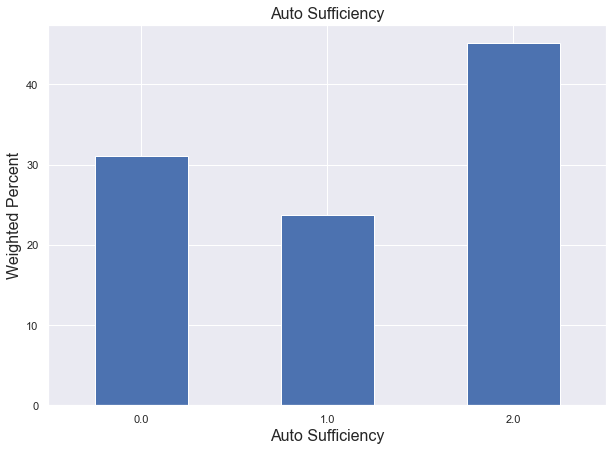

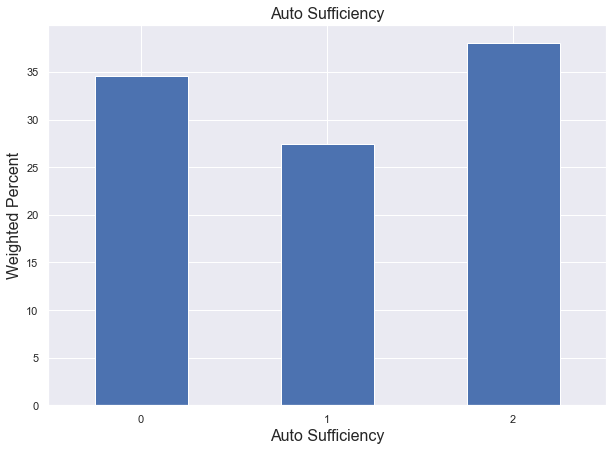

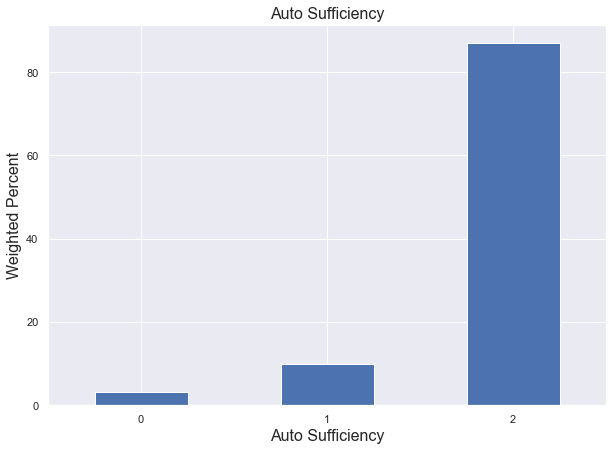

In [57]:
make_percentage_bar_plot(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_cta(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_metra(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

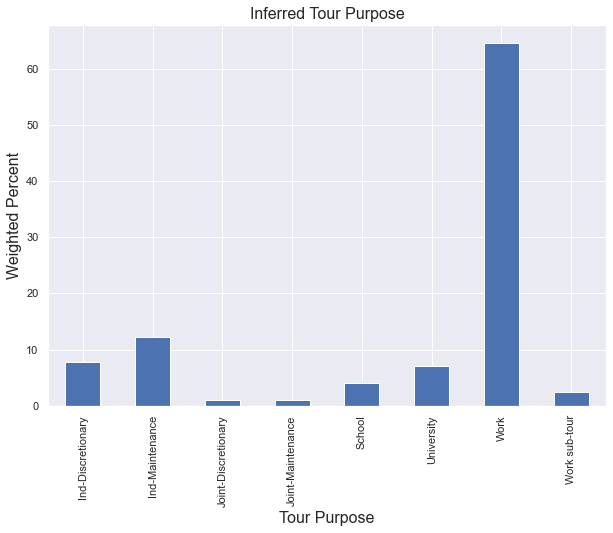

In [58]:
make_percentage_bar_plot(
    variable='TOUR_PURPOSE',
    title="Inferred Tour Purpose",
    xlabel="Tour Purpose",
    xlabel_rotation=90)


In [59]:
obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['linked_weight_scaled'] / access_df['linked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           linked_weight_scaled  Percent
TOUR_MODE                               
KNR                  106036.076    7.241
PNR                  213769.653   14.598
TNR                   17758.640    1.213
Walk                1126798.846   76.948


TOUR_MODE  study
KNR        cta      58518.082
           metra    42076.022
           pace      5441.973
PNR        cta      56511.000
           metra   147306.849
           pace      9951.804
TNR        cta      13370.921
           metra     4387.719
Walk       cta     981229.065
           metra    73196.531
           pace     72373.251
Name: linked_weight_scaled, dtype: float64

## Summary tables

### Boardings by line

In [60]:
obs_df['metra_route'] = obs_df['Train_Line']
obs_df['pace_route'] = obs_df['line_name']

metra_route_lookup = {
    1:'Electric, South Chicago',
    4:'Electric, Blue Island ',
    5:'Electric, Main Line',
    6:'Rock Island',
    8:'SouthWest Service',
    9:'Heritage Corridor',
    10:'BNSF',
    11:'Union Pacific West',
    12:'Milwaukee West',
    13:'Union Pacific North West',
    15:'Milwaukee North',
    16:'North Central Service',
    17:'Union Pacific North'}

obs_df.replace({"metra_route": metra_route_lookup}, inplace = True)

obs_df['route'] = obs_df.route_id.combine_first(obs_df.metra_route)
obs_df['route'] = obs_df.route.combine_first(obs_df.pace_route)

obs_df.route.value_counts()

BNSF                        21902
Union Pacific North West    14224
Rock Island                 13350
Red Line                    13147
Union Pacific West          12396
                            ...  
WEST MADISON - HILLSIDE         1
WESTERN                         1
EVANSTON CIRCULATOR             1
MONTROSE                        1
CENTRAL/RIDGE                   1
Name: route, Length: 354, dtype: int64

In [61]:
mode_df = obs_df.groupby(['TOUR_MODE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
mode_df['Percent'] = mode_df['linked_weight_scaled'] / mode_df['linked_weight_scaled'].sum() * 100
display(HTML(mode_df.to_html()))

,linked_weight_scaled,Percent
TOUR_MODE,,
KNR,106036.076,7.241
PNR,213769.653,14.598
TNR,17758.640,1.213
Walk,1126798.846,76.948


### Linked trips by transit mode + tour purpose

In [62]:
mode_purpose_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], obs_df['TOUR_MODE'], values=obs_df['linked_weight_scaled'], aggfunc=sum, margins=True)
mode_purpose_ct = add_percentage_to_crosstab(mode_purpose_ct)
mode_purpose_ct.fillna(0, inplace=True)
mode_purpose_ct.applymap(lambda x: round(x,2))


TOUR_MODE,KNR,PNR,TNR,Walk,All,Percent
TOUR_PURPOSE,,,,,,
Ind-Discretionary,5504.540,4318.910,1701.130,99730.190,111254.760,7.600
Ind-Maintenance,8370.980,6719.240,2451.760,156913.700,174455.680,11.910
Joint-Discretionary,1109.950,492.210,263.590,11824.170,13689.910,0.930
Joint-Maintenance,902.650,232.900,143.360,11585.980,12864.890,0.880
School,6349.710,1130.110,367.440,45788.270,53635.540,3.660
University,6548.870,6032.550,904.480,84211.260,97697.160,6.670
Work,74915.720,189040.980,11282.130,688002.260,963241.100,65.780
Work sub-tour,2333.660,5802.750,644.760,28743.020,37524.180,2.560
All,106036.080,213769.650,17758.640,1126798.850,1464363.220,100.000


### Linked trips by tour purpose, auto sufficiency, and access mode

In [63]:
purpose_suff_access_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], [obs_df['auto_suff'], obs_df['access_mode']], values=obs_df['linked_weight_scaled'], aggfunc=sum, margins=True)
purpose_suff_access_ct = add_percentage_to_crosstab(purpose_suff_access_ct)
purpose_suff_access_ct.fillna(0, inplace=True)
purpose_suff_access_ct.applymap(lambda x: round(x,2))

auto_suff                0.0                                    1.0            \
access_mode              KNR      PNR      TNR       Walk       KNR       PNR   
TOUR_PURPOSE                                                                    
Ind-Discretionary   1126.630   33.770  128.080  40144.180  1165.460   315.160   
Ind-Maintenance     1728.340  747.840  346.770  83014.670  1115.050   258.710   
Joint-Discretionary  192.910    0.000   12.760   3667.580   178.520     3.940   
Joint-Maintenance     76.700    1.250   17.040   4437.440    84.630     7.830   
School               199.280    2.680   66.230   9031.000   989.590    70.810   
University           559.810   76.130   65.480  34576.500   894.410   505.440   
Work                5318.310 2113.280 1718.300 227936.030 11332.320  9756.710   
Work sub-tour        112.330   93.680   47.920   9249.420   378.080   526.800   
All                 9314.310 3068.620 2402.570 412056.820 16138.050 11445.390   
Percent                0.640    0.210    0.160     28.140     1.100     0.780   

auto_suff                                     2.0                      \
access_mode              TNR       Walk       KNR        PNR      TNR   
TOUR_PURPOSE                                                            
Ind-Discretionary    232.930  22190.390  1290.300   2981.160  487.990   
Ind-Maintenance      244.610  23803.290  3334.410   3215.560  649.940   
Joint-Discretionary   20.120   4267.520   418.550    361.770   72.200   
Joint-Maintenance     20.820   2900.880   493.070    142.630   30.310   
School                 1.550  12697.690  3445.640    764.210  200.890   
University           110.230  18087.170  2907.360   3328.470  277.550   
Work                1530.050 212830.280 29461.390  90634.120 3400.830   
Work sub-tour        200.090   6508.480   978.720   3012.110  286.240   
All                 2360.400 303285.690 42329.430 104440.020 5405.950   
Percent                0.160     20.710     2.890      7.130    0.370   

auto_suff                              All Percent  
access_mode               Walk                      
TOUR_PURPOSE                                        
Ind-Discretionary    41158.720  111254.760   7.600  
Ind-Maintenance      55996.490  174455.680  11.910  
Joint-Discretionary   4494.050   13689.910   0.930  
Joint-Maintenance     4652.290   12864.890   0.880  
School               26165.980   53635.540   3.660  
University           36308.610   97697.160   6.670  
Work                367209.480  963241.100  65.780  
Work sub-tour        16130.320   37524.180   2.560  
All                 552115.950 1464363.220 100.000  
Percent                 37.700     100.000   0.000

## Write coded output

In [64]:
obs_df.to_csv(os.path.join(output_path, 'processed_obs.csv'))

In [65]:
obs_df.groupby('study').sum('unlinked_weight_scaled')

,hh_employed,hh_veh,hh_size,unlinked_weight,linked_weight,auto_suff,unlinked_weight_scaled,total_transfers_updated,linked_weight_scaled,Mode_Access_Code,Mode_Egress_Code,Rail_Line,Train_Line,Transfer_To,Origin_Code,Destination_Code,ON_Weight,OFF_Weight,Gender_Code,Age_Code,Race_single_field,HH_People,HH_Children,HH_Employed,HH_Income_Code,autosuff,num_transfers,surveyed_hour,sampno,perno,placeno,transitno,latitude,longitude,imputed,access,egress,transfers,tpurp,person_weight,trip_rate_factor,trip_weight,hhsize,hhveh,workers,schol,opurp,arr_hour,uWTP,expuWTP,probWTP,randn,uWST,expuWST,probWST,uFJT,expuFJT,probFJT
study,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cta,119490.000,80443.000,179588.000,1339652.681,1001704.188,80518.000,1468731.000,34348.000,1109629.066,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-49840.478,52332.094,24362.861,34966.708,-311399.110,5845.936,3839.490,-168665.193,7728.409,6679.815
metra,0.000,0.000,0.000,260000.000,259218.483,207774.000,267772.000,0.000,266967.121,322204.000,274970.000,1233038.000,1226970.000,0.000,156384.000,281880.000,260000.000,260095.161,172482.000,234870.000,227446.000,304024.000,77420.000,169252.000,973620.000,207774.000,716.000,755326.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,123994.874,483660.260,80899.235,56524.781,-417207.560,5611.338,4468.794,-366768.236,4560.210,4362.969
pace,0.000,0.000,2179.000,166729.513,142275.831,1104.000,102852.000,0.000,87767.028,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,56596715575.000,1246.000,2591.000,1628.000,34097.082,-71491.634,1035.000,0.000,0.000,120.000,4744.000,120014.426,906.305,142275.831,2179.000,1160.000,1197.000,137.000,4794.000,10363.000,-210.903,1250.909,359.727,410.485,-3547.190,52.757,36.499,-2067.531,75.963,67.542
